# DECISION TREES

In [15]:
import pandas as pd
import numpy as np

train = pd.read_csv('ed-titanic-training.csv', index_col=False).drop('Unnamed: 0', axis=1)
test = pd.read_csv('ed-titanic-test.csv').drop('Unnamed: 0', axis=1)
train.head(3)

Survived  Pclass  Sex  Age  Parch  Fare  Embarked  Has_Cabin  FamilySize  \
0         0       3    1    1      0     0         0          0           2   
1         1       1    0    2      0     3         1          1           2   
2         1       3    0    1      0     1         0          0           1   

   IsAlone  Title  
0        0      1  
1        0      3  
2        1      4

In [16]:
test.head(3)

Pclass  Sex  Age  Parch  Fare  Embarked  Has_Cabin  FamilySize  IsAlone  \
0       3    1    2      0     0         2          0           1        1   
1       3    0    2      0     0         0          0           2        0   
2       2    1    3      0     1         2          0           1        1   

   Title  
0      1  
1      3  
2      1

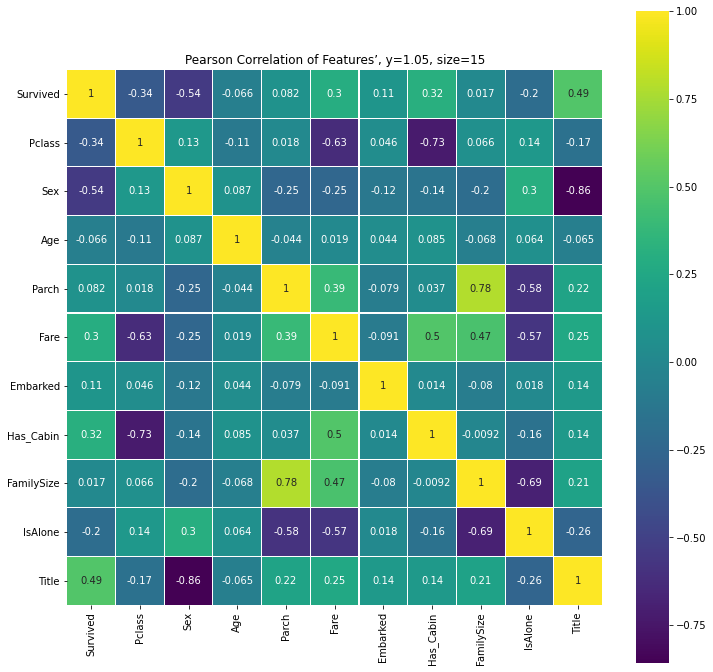

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features’, y=1.05, size=15')
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0,
square=True, cmap=colormap, linecolor='white', annot=True)

# 3. Survival rate vs title

In [23]:
train[['Survived', 'Title']].groupby('Title').mean().sort_values(by='Survived')

Survived
Title          
1      0.156673
5      0.347826
2      0.575000
4      0.702703
3      0.793651

# 4. Find best depth for the tree

In [62]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

x_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]

parameters = {'max_depth':list(range(1, 10))}
model = tree.DecisionTreeClassifier(criterion='entropy')
clf = GridSearchCV(model, parameters, cv=10)
clf.fit(x_train, y_train)
clf.best_params_

{'max_depth': 3}

# 5. Best tree

In [39]:
decision_tree = tree.DecisionTreeClassifier(max_depth = clf.best_params_['max_depth'],
                                            criterion='entropy')
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# 6. Prediciton on test set

In [46]:
predictions = decision_tree.predict(test)
predictions_df = test.copy()
predictions_df['Predicted Survival'] = pd.Series(predictions)
predictions_df.to_csv('predictions.csv', index=False)

In [45]:
predictions_df

Pclass  Sex  Age  Parch  Fare  Embarked  Has_Cabin  FamilySize  IsAlone  \
0         3    1    2      0     0         2          0           1        1   
1         3    0    2      0     0         0          0           2        0   
2         2    1    3      0     1         2          0           1        1   
3         3    1    1      0     1         0          0           1        1   
4         3    0    1      1     1         0          0           3        0   
..      ...  ...  ...    ...   ...       ...        ...         ...      ...   
413       3    1    2      0     1         0          0           1        1   
414       1    0    2      0     3         1          1           1        1   
415       3    1    2      0     0         0          0           1        1   
416       3    1    2      0     1         0          0           1        1   
417       3    1    1      1     2         1          0           3        0   

     Title  Predicted Survival  
0        1                   0  
1        3                   1  
2        1                   0  
3        1                   0  
4        3                   1  
..     ...                 ...  
413      1                   0  
414      5                   0  
415      1                   0  
416      1                   0  
417      2                   1  

[418 rows x 11 columns]

# 7. Tree visualisation

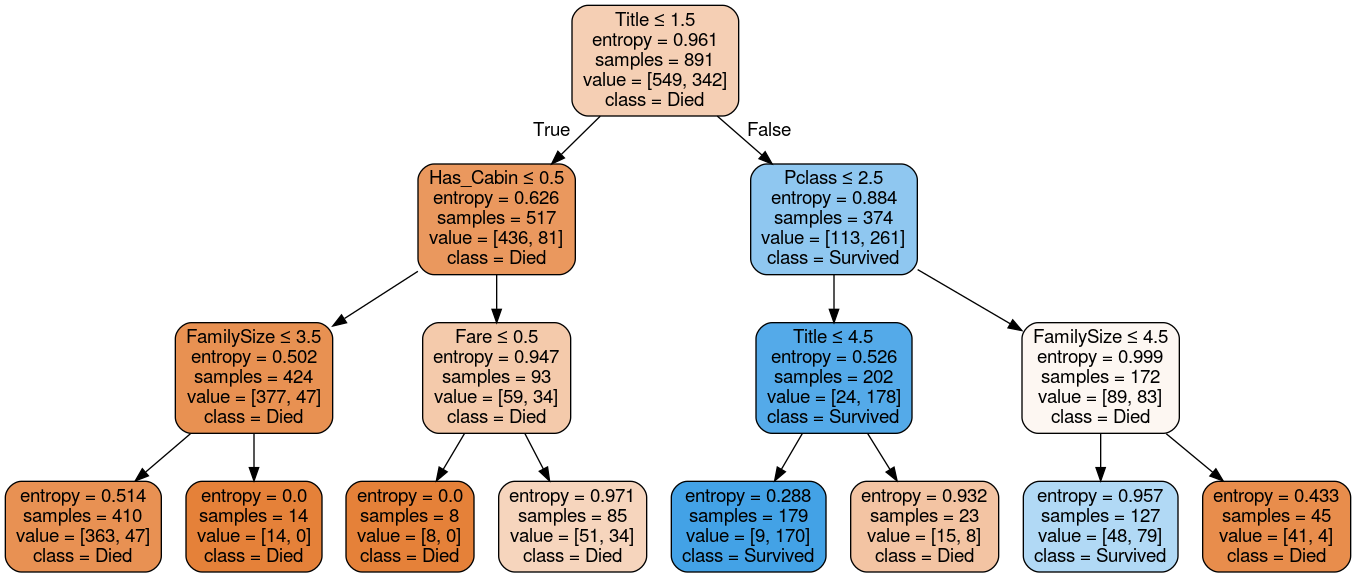

In [56]:

import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(decision_tree, 
 out_file=dot_data, 
 class_names=['Died', 'Survived'], # the target names.
 feature_names=x_train.columns, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# 8. Accuracy vs tree hyperparameters

In [73]:
parameters = {'max_depth':list(range(1, 5)),
             'criterion': ('entropy', 'gini'),
             'min_samples_leaf': list(range(1, 5))}

model = tree.DecisionTreeClassifier()
clf = GridSearchCV(model, parameters, scoring='accuracy', cv=10)
clf.fit(x_train, y_train)
clf.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1}

In [84]:
pd.set_option('display.max_colwidth', -1)
pd.DataFrame.from_dict(clf.cv_results_)[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

/home/andrzej/anaconda3/envs/ed/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


params  \
8   {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1}   
9   {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2}   
10  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 3}   
11  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4}   
24  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}      
25  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2}      
26  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3}      
27  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4}      
12  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1}   
15  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4}   
14  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3}   
13  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2}   
31  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4}      
28  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1}      
29  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2}      
30  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3}      
20  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}      
21  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2}      
22  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3}      
23  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4}      
7   {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 4}   
6   {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 3}   
5   {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 2}   
4   {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1}   
0   {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 1}   
19  {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 4}      
18  {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 3}      
17  {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2}      
1   {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 2}   
3   {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 4}   
2   {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 3}   
16  {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}      

    mean_test_score  
8   0.831648         
9   0.831648         
10  0.831648         
11  0.831648         
24  0.830524         
25  0.830524         
26  0.830524         
27  0.830524         
12  0.821536         
15  0.821536         
14  0.821536         
13  0.821536         
31  0.814794         
28  0.812547         
29  0.812547         
30  0.812547         
20  0.791298         
21  0.791298         
22  0.791298         
23  0.791298         
7   0.789051         
6   0.789051         
5   0.789051         
4   0.789051         
0   0.782285         
19  0.782285         
18  0.782285         
17  0.782285         
1   0.782285         
3   0.782285         
2   0.782285         
16  0.782285

In [85]:
pd.set_option('display.max_colwidth', 0)

# 9. Split dataset

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

# 10. Confusion matrix

In [77]:
decision_tree = tree.DecisionTreeClassifier(max_depth = clf.best_params_['max_depth'],
                                            criterion='entropy')
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

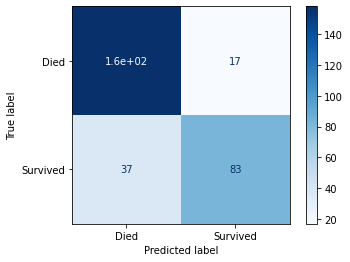

In [86]:
predictions = decision_tree.predict(X_test)

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(decision_tree, X_test, y_test,
                                 display_labels=['Died', 'Survived'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)

# 11. Metrics

In [91]:
from sklearn.metrics import f1_score, accuracy_score, average_precision_score
print(f'f1: {f1_score(y_test, predictions)}')
print(f'accuracy: {accuracy_score(y_test, predictions)}')
print(f'precision: {average_precision_score(y_test, predictions)}')

f1: 0.7545454545454545
accuracy: 0.8169491525423729
precision: 0.6995070621468926


# K-NN

In [121]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris = pd.DataFrame(iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
y_iris = pd.DataFrame(iris.target, columns=['type'])
X_iris.head(3)

sepal_length  sepal_width  petal_length  petal_width
0  5.1           3.5          1.4           0.2        
1  4.9           3.0          1.4           0.2        
2  4.7           3.2          1.3           0.2

In [113]:
nyt = pd.read_csv('nyt-frame.csv').drop('Unnamed: 0', axis=1)
nyt.head(3)

class.labels        X.  X.d  X.nd       X.s      X.th  X.this         a  \
0  art          0.008707  0.0  0.0   0.000000  0.009251  0.0     0.007564   
1  art          0.005848  0.0  0.0   0.000000  0.000000  0.0     0.001418   
2  art          0.016036  0.0  0.0   0.011403  0.000000  0.0     0.010063   

   abandoned  abc  ...  yorkers  yorks  you  young  younger  your  youre  \
0  0.0        0.0  ...  0.0      0.0    0.0  0.0    0.0      0.0   0.0     
1  0.0        0.0  ...  0.0      0.0    0.0  0.0    0.0      0.0   0.0     
2  0.0        0.0  ...  0.0      0.0    0.0  0.0    0.0      0.0   0.0     

   youth  youthful   yu  
0  0.0    0.0       0.0  
1  0.0    0.0       0.0  
2  0.0    0.0       0.0  

[3 rows x 4432 columns]

# Preprocessing

In [124]:
X_nyt = nyt.iloc[:, 1:]
y_nyt = nyt.iloc[:, 0]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_nyt = le.fit_transform(y_nyt).ravel()

from sklearn.decomposition import PCA
pca = PCA(10)
X_nyt = pca.fit_transform(X_nyt)

# Accuracy IRIS

In [128]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors': [1, 3, 5, 7]}

model = KNeighborsClassifier()
clf = GridSearchCV(model, parameters, scoring='accuracy', cv=10)
clf.fit(X_iris, y_iris.ravel())
clf.best_params_


{'n_neighbors': 5}

In [129]:
pd.set_option('display.max_colwidth', -1)
pd.DataFrame.from_dict(clf.cv_results_)[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

/home/andrzej/anaconda3/envs/ed/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


params  mean_test_score
2  {'n_neighbors': 5}  0.966667       
3  {'n_neighbors': 7}  0.966667       
1  {'n_neighbors': 3}  0.966667       
0  {'n_neighbors': 1}  0.960000

# Accuracy NYT

In [134]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors': [1, 3, 5, 7]}

model = KNeighborsClassifier()
clf = GridSearchCV(model, parameters, scoring='accuracy', cv=10)
clf.fit(X_nyt, y_nyt.ravel())
clf.best_params_


{'n_neighbors': 5}

In [135]:
pd.set_option('display.max_colwidth', -1)
pd.DataFrame.from_dict(clf.cv_results_)[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

/home/andrzej/anaconda3/envs/ed/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


params  mean_test_score
2  {'n_neighbors': 5}  0.842727       
1  {'n_neighbors': 3}  0.822727       
3  {'n_neighbors': 7}  0.822727       
0  {'n_neighbors': 1}  0.821818

# METRIC (euclidian vs taxi distance) and WEIGHTS vs accuracy

In [136]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {'p': [1, 2],
             'weights': ['uniform', 'distance']}

model = KNeighborsClassifier(n_neighbors=clf.best_params_['n_neighbors'])
clf = GridSearchCV(model, parameters, scoring='accuracy', cv=10)
clf.fit(X_nyt, y_nyt.ravel())
clf.best_params_


{'p': 2, 'weights': 'uniform'}

In [137]:
pd.set_option('display.max_colwidth', -1)
pd.DataFrame.from_dict(clf.cv_results_)[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

/home/andrzej/anaconda3/envs/ed/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


params  mean_test_score
2  {'p': 2, 'weights': 'uniform'}   0.842727       
3  {'p': 2, 'weights': 'distance'}  0.842727       
0  {'p': 1, 'weights': 'uniform'}   0.822727       
1  {'p': 1, 'weights': 'distance'}  0.822727